In [1]:
import pandas as pd
import scanpy as sc
import itertools
import anndata
import itertools
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from sklearn.preprocessing import normalize
from itertools import product
import umap
from collections import Counter
from sklearn.decomposition import PCA
import gridot

# Download data
Download all processed scRNA-seq and scATAC-seq here: https://drive.google.com/drive/folders/1Lci6nIkM8B6ZO8i_T-Th8ah6ao_MFhmr?usp=drive_link


In [2]:
atac_adata = sc.read_h5ad("./data/atac_kidney_control1_lda_5celltypes.h5ad")
atac_adata

AnnData object with n_obs × n_vars = 1592 × 118048
    obs: 'barcode', 'patient', 'disease', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'pct_reads_in_peaks', 'UMAP_1', 'UMAP_2', 'n_genes'
    var: 'peaks', 'chr_no', 'start', 'end', 'Chromosome', 'Start', 'End', 'n_cells'
    obsm: 'X_lda'

In [3]:
rna_adata = sc.read_h5ad("./data/rna_data_filtered_pca_1control_5cells.h5ad")
rna_adata

AnnData object with n_obs × n_vars = 1879 × 4369
    obs: 'name', 'barcode', 'patient', 'gender', 'disease', 'celltype', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
import pandas as pd
atac = atac_adata.obsm['X_lda']
rna = rna_adata.obsm['X_pca']



a_ctypes = atac_adata.obs["celltype"]
r_ctypes = rna_adata.obs["celltype"]



X = atac
y = rna

In [5]:
import pandas as pd

# Convert atac and rna arrays to DataFrames
atac_df = pd.DataFrame(atac)
rna_df = pd.DataFrame(rna)




In [6]:
atac_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.005396,0.004496,0.008094,0.003597,0.273381,0.000899,0.000899,0.000899,0.001799,0.004496,...,0.002698,0.004496,0.000899,0.000899,0.000899,0.000899,0.006295,0.000899,0.002698,0.376799
1,0.007212,0.002404,0.002404,0.006410,0.244391,0.000801,0.001603,0.000801,0.001603,0.002404,...,0.000801,0.000801,0.002404,0.006410,0.000801,0.004006,0.003205,0.000801,0.000801,0.425481
2,0.002348,0.001342,0.009561,0.001845,0.000168,0.000839,0.002348,0.001006,0.006541,0.005871,...,0.000335,0.007380,0.001174,0.002013,0.000839,0.002684,0.009057,0.003522,0.000671,0.321033
3,0.003280,0.003280,0.001262,0.000757,0.000505,0.010346,0.002019,0.000757,0.003785,0.002271,...,0.001766,0.000757,0.063084,0.001766,0.001262,0.008832,0.001262,0.002019,0.001009,0.321221
4,0.001271,0.004447,0.005718,0.019060,0.306226,0.004447,0.000635,0.002541,0.003177,0.004447,...,0.004447,0.007624,0.000635,0.002541,0.001906,0.002541,0.001271,0.006353,0.003177,0.391995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.002330,0.006602,0.000194,0.002136,0.009320,0.001748,0.009320,0.002136,0.004660,0.005049,...,0.001942,0.014175,0.081165,0.004660,0.005825,0.001748,0.000388,0.001359,0.005437,0.293592
1588,0.002683,0.000894,0.008050,0.118068,0.070662,0.004472,0.001789,0.003578,0.001789,0.003578,...,0.002683,0.003578,0.002683,0.004472,0.000894,0.000894,0.000894,0.000894,0.003578,0.360465
1589,0.000809,0.004316,0.004856,0.005395,0.001619,0.005395,0.001349,0.006744,0.002967,0.001349,...,0.007553,0.004856,0.000540,0.001349,0.000270,0.002158,0.003777,0.001619,0.004856,0.309145
1590,0.000786,0.000314,0.000314,0.000314,0.000157,0.005814,0.000471,0.002671,0.000314,0.004871,...,0.012728,0.000471,0.063011,0.002986,0.001571,0.004871,0.004714,0.001728,0.014142,0.244500


In [7]:
atac_mtx = atac_df
rna_mtx = rna_df


In [8]:
from scotplus.solvers import SinkhornSolver
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
rna_mtx=normalize(rna_mtx)
atac_mtx=normalize(atac_mtx)

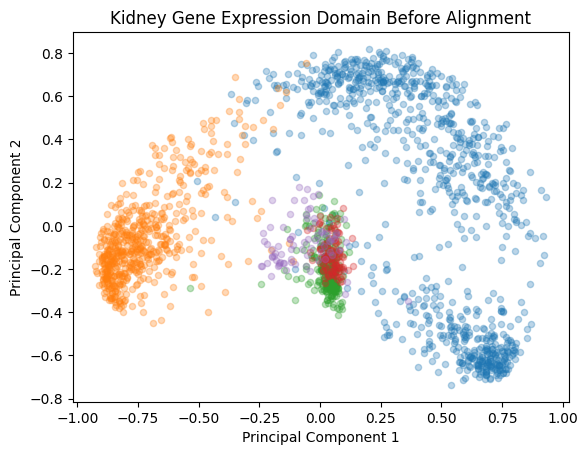

In [42]:
# visualize rna
import numpy as np

label_array = np.array(r_ctypes.to_list())

unique_labels = np.unique(label_array)
rna_pca = PCA(n_components=2)
rna_pca.fit(rna_mtx)
rna_2Dpca = rna_pca.transform(rna_mtx)
plt.figure()

for label in unique_labels:
    subset = (label_array == label)
    plt.scatter(rna_2Dpca[subset, 0], rna_2Dpca[subset, 1], s=20, alpha=0.3, label=label)

# plt.legend(loc='best', shadow=False)
plt.title('Kidney Gene Expression Domain Before Alignment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

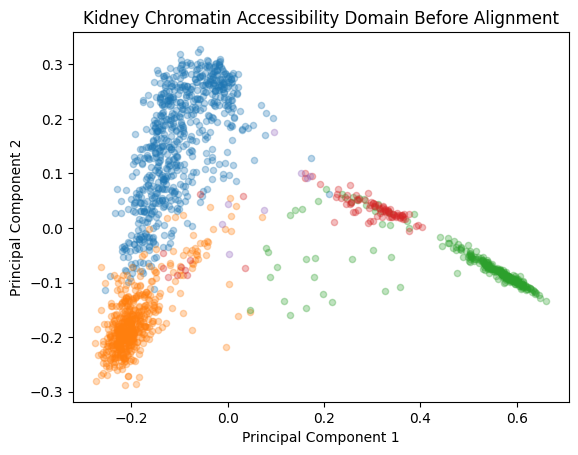

In [43]:
# visualize ATAC
import numpy as np

label_array = np.array(a_ctypes.to_list())

unique_labels = np.unique(label_array)
atac_pca=PCA(n_components=2)
atac_2Dpca=atac_pca.fit_transform(atac_mtx)
plt.figure()

for label in unique_labels:
    subset = (label_array == label)
    plt.scatter(atac_2Dpca[subset, 0], atac_2Dpca[subset, 1], s=20, alpha=0.3, label=label)

# plt.legend(loc='best', shadow=False)
plt.title('Kidney Chromatin Accessibility Domain Before Alignment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [44]:
# compute distance matrices
from scotplus.utils.alignment import compute_graph_distances
D_rna = compute_graph_distances(rna_mtx, n_neighbors=100, mode='connectivity')
D_atac = compute_graph_distances(atac_mtx, n_neighbors=100, mode='connectivity')

In [45]:
rna_labels, atac_labels = r_ctypes, a_ctypes

sample_supervision = np.zeros((rna_labels.shape[0], atac_labels.shape[0]))
for i, r_lbl in enumerate(rna_labels):
    for j, a_lbl in enumerate(atac_labels):
        if r_lbl == a_lbl:
            sample_supervision[i, j] = -1

In [49]:
# Convert all to same dtype, e.g., float32
rna_mtx = rna_mtx.astype(np.float32)
atac_mtx = atac_mtx.astype(np.float32)
D_rna = D_rna.astype(np.float32)
D_atac = D_atac.astype(np.float32)
sample_supervision = sample_supervision.astype(np.float32)  # if used


In [54]:
from scotplus.utils.alignment import get_barycentre, LTA
scot = SinkhornSolver(tol_uot=1e-5, nits_uot=int(1e4), nits_bcd=15)
pi_samp,_,pi_feat = scot.uagw(rna_mtx, atac_mtx, D_rna, D_atac, alpha=0.2, eps = 0.005, rho=0.9, beta=(1,0), D=(sample_supervision, 0), verbose = True)
aligned_atac = get_barycentre(rna_mtx, np.transpose(pi_samp))
LTA(rna_mtx, aligned_atac, r_ctypes, a_ctypes, k=5)

BCD Iteration 1 - Loss: -0.339677, -0.327590
BCD Iteration 2 - Loss: -0.338453, -0.325998
BCD Iteration 3 - Loss: -0.338463, -0.325992
BCD Iteration 4 - Loss: -0.338464, -0.325992


0.968068121341139

<AxesSubplot: >

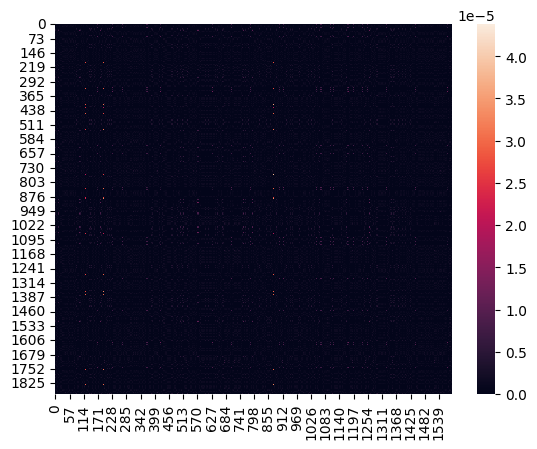

In [55]:
import seaborn as sns

sns.heatmap(pi_samp)

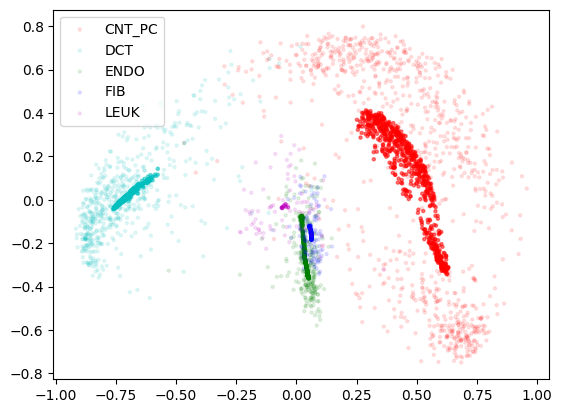

In [56]:
Xrna_integrated=rna_mtx
Yatac_subsamp_integrated=aligned_atac
concatenated=np.concatenate((Xrna_integrated,Yatac_subsamp_integrated), axis=0)

pca = PCA(n_components=2)

pca.fit(concatenated)
concatenated_pc=pca.transform(concatenated)
Xrna_integrated_pc=concatenated_pc[0:Xrna_integrated.shape[0],:]
Yatac_subsamp_integrated_pc=concatenated_pc[Xrna_integrated.shape[0]:,:]

rna_labels = np.array(r_ctypes)
atac_labels = np.array(a_ctypes)
alphas = (np.hstack((np.ones_like(rna_labels, dtype=int)/10, np.ones_like(atac_labels, dtype=int)/2)))

for (label, color) in zip(unique_labels, ['r', 'c', 'g', 'b', 'm', '#ffa500', '#964b00']):
    mask = (np.hstack((rna_labels, atac_labels)) == label)
    plt.scatter(np.vstack((Xrna_integrated_pc, Yatac_subsamp_integrated_pc))[mask, 0], np.vstack((Xrna_integrated_pc, Yatac_subsamp_integrated_pc))[mask, 1], s=5, label = label, c=color, alpha=alphas[mask])
plt.legend(loc='best', shadow=False)
plt.show()

In [67]:
from scotplus.utils.alignment import get_barycentre
aligned_rna = get_barycentre(torch.tensor(atac_mtx,dtype = torch.float32), (pi_samp.cpu()))
atac.shape, aligned_rna.shape

((3184, 51), torch.Size([1879, 50]))

In [68]:
from scotplus.solvers import SinkhornSolver
from sklearn.preprocessing import normalize
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from gridot.utils import *
new_atac = pseudo_atac_generation(atac_adata.X,torch.tensor(pi_samp, dtype=torch.float32), 20,threshold = 0.1)

### preprocessing atac seq
atac_adata.var.index = atac_adata.var.index.astype(str)
atac_adata.var.columns = atac_adata.var.columns.astype(str)
projected_atac =  sc.AnnData(new_atac,
                      var = atac_adata.var,
                      obs = rna_adata.obs[['celltype']]
                      )

sc.pp.filter_cells(projected_atac, min_genes=200) #filter out cells that express less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_genes(projected_atac, min_cells=3)
projected_atac.obs['orig.ident'] = projected_atac.obs.index
projected_atac.var['features'] = projected_atac.var.index


projected_atac.var[['chr_no', 'start','end']] = projected_atac.var['features'].str.split('-|:', expand=True)
projected_atac.write_h5ad('./data/pseudo_atac_20_0.1.h5ad')
